In [1]:
import skfuzzy as fuzz
import numpy as np
from matplotlib import pyplot as plt

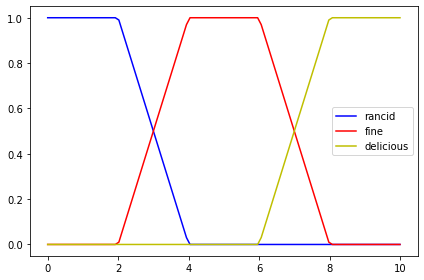

In [2]:
x_food = np.linspace(0, 10, 100)
food_rancid = fuzz.trapmf(x_food, [0, 0, 2, 4])
food_fine = fuzz.trapmf(x_food, [2, 4, 6, 8])
food_delicious = fuzz.trapmf(x_food, [6, 8, 10, 10])
plt.plot(x_food, food_rancid, 'b-', label='rancid')
plt.plot(x_food, food_fine, 'r-', label='fine')
plt.plot(x_food, food_delicious, 'y-', label='delicious')
plt.legend()
plt.tight_layout()

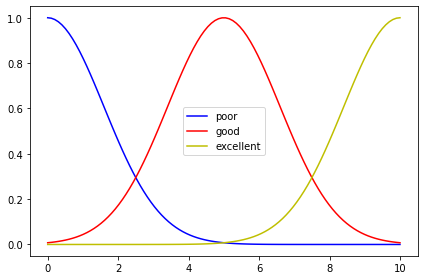

In [3]:
x_service = np.linspace(0, 10, 100)
service_poor = fuzz.gaussmf(x_service, 0, 1.6)
service_good = fuzz.gaussmf(x_service, 5, 1.6)
service_excellent = fuzz.gaussmf(x_service, 10, 1.6)
plt.plot(x_service, service_poor, 'b-', label='poor')
plt.plot(x_service, service_good, 'r-', label='good')
plt.plot(x_service, service_excellent, 'y-', label='excellent')
plt.legend()
plt.tight_layout()

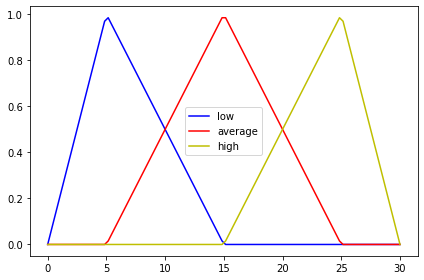

In [4]:
x_tip = np.linspace(0, 30, 100)
tip_low = fuzz.trimf(x_tip, [0, 5, 15])
tip_average = fuzz.trimf(x_tip, [5, 15, 25])
tip_high = fuzz.trimf(x_tip, [15, 25, 30])
plt.plot(x_tip, tip_low, 'b-', label='low')
plt.plot(x_tip, tip_average, 'r-', label='average')
plt.plot(x_tip, tip_high, 'y-', label='high')
plt.legend()
plt.tight_layout()

1. If service is poor or food is rancid then tip is low
2. If service is good then tip is average
3. If service is excellent of food is delicious then tip is high

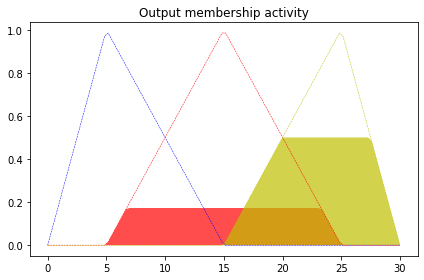

In [5]:
food_level_rancid = fuzz.interp_membership(x_food, food_rancid, 7)
food_level_fine = fuzz.interp_membership(x_food, food_fine, 7)
food_level_delicious = fuzz.interp_membership(x_food, food_delicious, 7)

service_level_poor = fuzz.interp_membership(x_service, service_poor, 8)
service_level_good = fuzz.interp_membership(x_service, service_good, 8)
service_level_excellent = fuzz.interp_membership(x_service, service_excellent, 8)

active_rule1 = np.fmax(service_level_poor, food_level_rancid)
tip_activation_low = np.fmin(active_rule1, tip_low)

tip_activation_average = np.fmin(service_level_good, tip_average)

active_rule3 = np.fmax(service_level_excellent, food_level_delicious)
tip_activation_high = np.fmin(active_rule3, tip_high)

tip0 = np.zeros_like(x_tip)

plt.fill_between(x_tip, tip0, tip_activation_low, facecolor='b', alpha=0.7)
plt.plot(x_tip, tip_low, 'b', linewidth=0.5, linestyle='--', )
plt.fill_between(x_tip, tip0, tip_activation_average, facecolor='r', alpha=0.7)
plt.plot(x_tip, tip_average, 'r', linewidth=0.5, linestyle='--')
plt.fill_between(x_tip, tip0, tip_activation_high, facecolor='y', alpha=0.7)
plt.plot(x_tip, tip_high, 'y', linewidth=0.5, linestyle='--')
plt.title('Output membership activity')
plt.tight_layout()

Text(0.5, 1.0, 'Aggregated membership and result (line)')

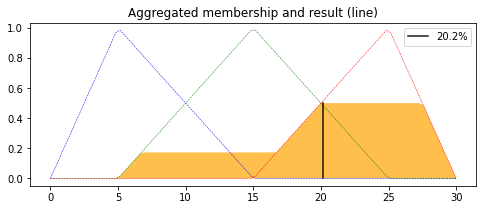

In [6]:
aggregated = np.fmax(np.fmax(tip_activation_low, tip_activation_average), tip_activation_high)

tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)
tip_label = f'{np.around(tip, 1)}%'

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_low, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_average, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9, label=tip_label)
ax0.legend()
ax0.set_title('Aggregated membership and result (line)')